# Chủ đề bài tập lớn: Khoa học về rượu

## Thành viên tham gia:
<ul>
<li style="font-size:20px">Lê Tuấn Minh</li>
<li style="font-size:20px">Phạm Trung Dũng</li>
<li style="font-size:20px">Hoàng Công Tú</li>
<li style="font-size:20px">Trịnh Anh Sơn</li>
</ul>

## Nội dung:
### 1. Khám phá dữ liệu.
### 2. Xem xét mối quan hệ giữa chúng
### 3. Phát hiện ngoại lệ

# Phần 1. Khám phá dữ liệu

In [2]:
from time import time
import numpy as np  # Thư viện toán học phổ biến và mạnh mẽ của python
import pandas as pd  # Truy xuất dữ liệu
from IPython.display import display  # Dùng để hiển thị các DataFrame
import matplotlib.pyplot as plt  # Hỗ trợ tạo ra các đồ thị
import seaborn as sns  # Hỗ trợ tạo ra các đồ thị

%matplotlib inline


In [3]:
# Load the Red Wines dataset
data = pd.read_csv('winequality-red.csv', sep=';')

# int 6 dòng đầu của data
display(data.head(n=6))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info() # định dạng type của các cột
display(data.shape) # số dòng và cột của data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

# Phân loại rượu

In [5]:
n_wines = data.shape[0] # số hàng
n_data = data.shape[1] # số cột

# sử dụng loc để truy vấn vào từngg giá trị trong bảng
 
# Số lượng rượu có xếp hạng chất lượng trên 6
quality_above_6 = data.loc[(data['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]

# Số lượng rượu có xếp hạng chất lượng dưới 5
quality_below_5 = data.loc[(data['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]

# Số lượng rượu có xếp hạng chất lượng từ 5 đến 6
quality_between_5 = data.loc[(data['quality']) >= 5 & (data['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]

# tỷ lệ rượu vang có xếp hạng chất lượng lớn hơn 6
greater_percent = n_above_6*100/n_wines

# Print the results
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(
    greater_percent))


Total number of wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating 5 and 6: 1599
Percentage of wines with quality 7 and above: 13.57%


# Thống kê rượu ngon

In [6]:
# tạo cột mớt để tìm giá trị chất lượng >= 7
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]

# đếm số Lượng
data['goodquality'].value_counts()


0    1382
1     217
Name: goodquality, dtype: int64

# sự khác biệt trong khi sử dụng iloc

In [7]:
data.iloc[9]
type(data.iloc[9])  # kiểm tra kiểu ( trả về kiểu series )

# nếu muốn trả về dạng datafame thì ta sử dụng :
data.iloc[[9]]



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
9,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5,0


Trong 1 số TH data cần ở dạng float, int nhưng lại trả vể cả String vd: cột PH có data là 3pH hay 5 pH ở dạng String

data.pH = data.pH.apply(lambda x: float(x.replace('pH', '')))

In [8]:
# describe trong pandas dùng để hiển thị số liệu thống kê
display(np.round(data.describe()))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0,0.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0,0.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0,0.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0,0.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0,0.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0,0.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0,1.0


### chú thích:
- count: số lượng dữ liệu trong cột
- mean: số trung bình chung của cột
- std: độ lệch chuẩn
- min: dữ liệu thấp nhất của cột
- 25%, 50%, 75%: giá trị ở vị trí x%
- max: dữ liệu cao nhất của cột

# sử dụng groupby để bao quát dữ liệu

ví dụ bạn muốn thống kê theo count chất lượng của rượu

In [9]:
total_data_quanlity = data.groupby('quality')['quality'].count()
print(total_data_quanlity)


quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


# Các kiểu style trong matliblot

In [10]:
plt.style.available
plt.style.use('seaborn-dark-palette')
plt.style.use('tableau-colorblind10')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')


# Biểu thị chất lượng theo số lượng bằng đồ thị

Text(0.5, 0, 'Quality')

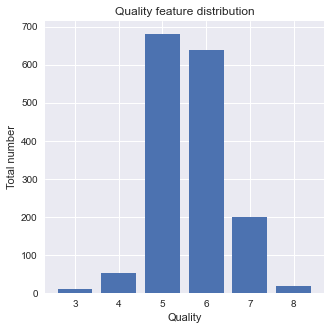

In [11]:

# định dạng kích thước chiều ngang dọc của hình
fig, ax = plt.subplots(figsize=(5, 5))  # tuỳ chỉnh độ dài rộng
# fig là hình tổng
# ax là từng hình nhỏ một

total_data_quanlity = dict(total_data_quanlity)
plt.bar(list(total_data_quanlity.keys()), list(total_data_quanlity.values()))
ax.set_title("Quality feature distribution")  # tên của đồ thị
ax.set_ylabel("Total number")  # tên của cột dọc
ax.set_xlabel("Quality")  # tên của cột ngang


# Biểu diễn đồ thị tổng quanlity theo trục ngang

Text(0.5, 0, 'Quality')

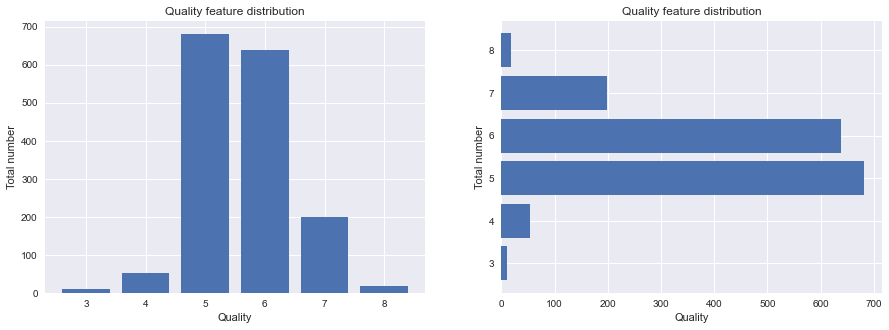

In [12]:

# định dạng kích thước chiều ngang dọc của hình
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 5)
                               )  # tuỳ chỉnh độ dài rộng
# fig là hình tổng
# ax là từng hình nhỏ một


# biểu diễn theo trục dọc
ax1.bar(list(total_data_quanlity.keys()), list(total_data_quanlity.values()))
ax1.set_title("Quality feature distribution")  # tên của đồ thị
ax1.set_ylabel("Total number")  # tên của cột dọc
ax1.set_xlabel("Quality")  # tên của cột ngang


# Biểu diễn theo trục ngang
ax2.barh(list(total_data_quanlity.keys()), list(total_data_quanlity.values()))
ax2.set_title("Quality feature distribution")  # tên của đồ thị
ax2.set_ylabel("Total number")  # tên của cột dọc
ax2.set_xlabel("Quality")  # tên của cột ngang


# Phần 2. Xem xét mối quan hệ giữa chúng

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='goodquality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile ac

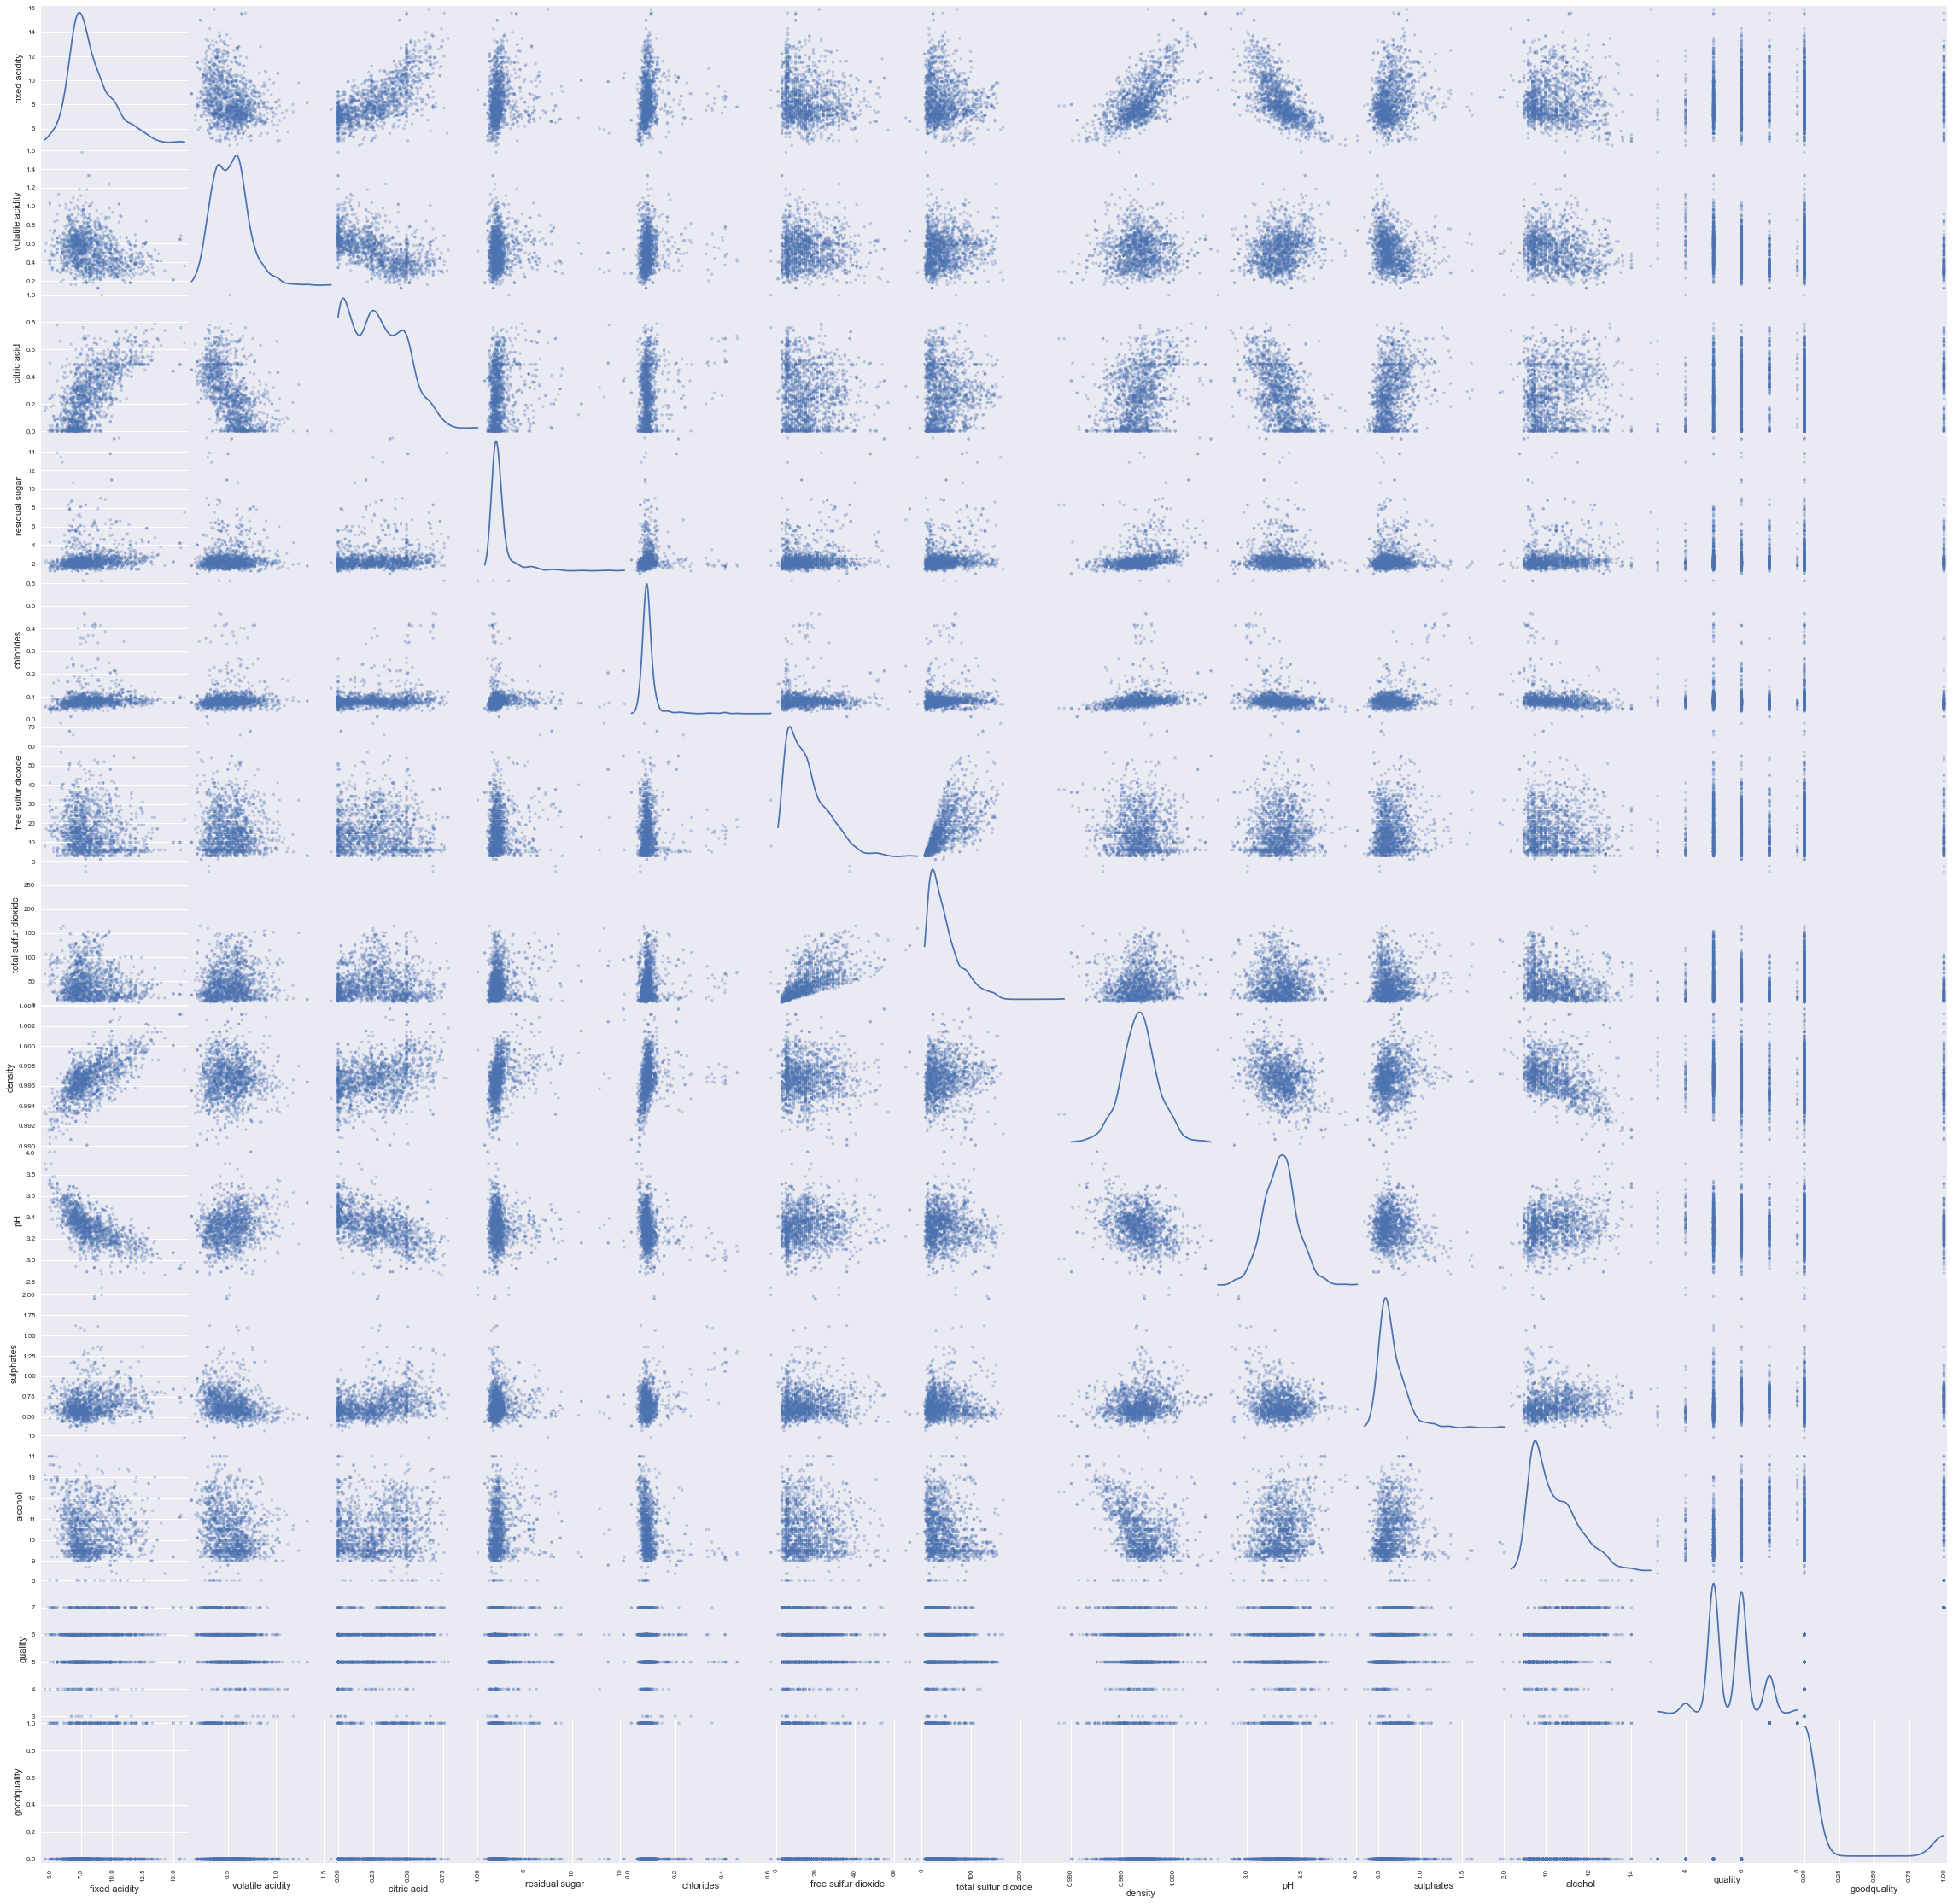

In [13]:
pd.plotting.scatter_matrix(data, alpha=0.3, figsize=(40, 40), diagonal='kde')

# Ma Trận tương quan
mối quan hệ giữa cái biến trong data

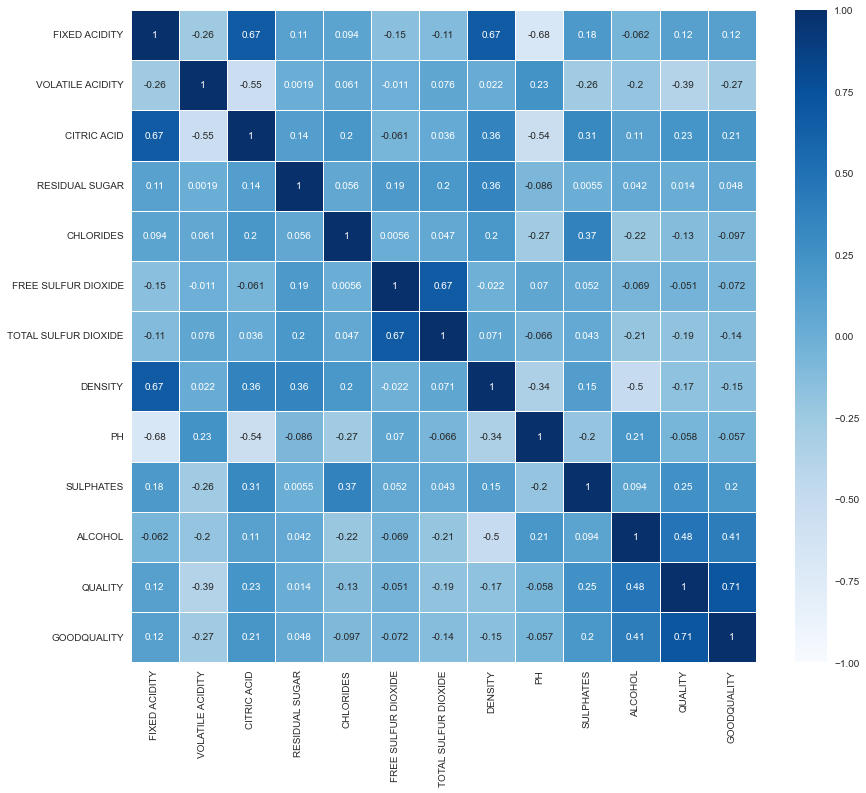

In [14]:
correlation = data.corr()
#display(correlation)
fig, ax = plt.subplots(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True,linewidths=0.5, vmin=-1, cmap="Blues",ax=ax)
ytichs = [i.upper() for i in correlation.index]
xtichs = [i.upper() for i in correlation.columns]

ax.set_yticklabels(ytichs)
ax.set_xticklabels(xtichs);

# Biểu diễn quan hệ giữa pH và nồng độ cồn từ đó bao quát được tỉ lệ lưu huỳnh tự do trên tổng số lưu huỳnh dioxit


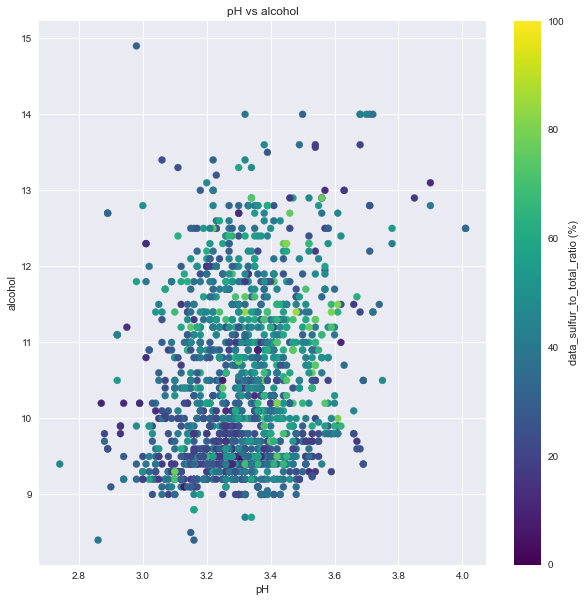

In [34]:
# tạo biểu đồ mo tả
# dùng scatter tạo biểu đồ rời rạc
data_pH, data_alcohol = data['pH'], data['alcohol']

# tạo thêm cột tỉ lệ của lượng lưu huỳnh tự do trên tổng lượng lưu huỳnh
data['sulfur to total ratio'] = data['free sulfur dioxide'] / \
    data['total sulfur dioxide']*100


data_sulfur_to_total_ratio = data['sulfur to total ratio']

# mở rộng biểu đồ
plt.figure(figsize=(10, 10))

plt.scatter(data_pH, data_alcohol, c=data_sulfur_to_total_ratio,
            cmap='viridis')
# dùng np.log10(data_density) để truy vấn tại điểm là nồng độ cồn

# đặt tên
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.title('pH vs alcohol')

# chỉ cột màu bên phải tương ứng với tỉ lệ lưu huỳnh tự do trên tổng
plt.colorbar(label='data_sulfur_to_total_ratio (%)')

# do tổng lượng lưu huỳnh dioxit từ 6 đến 289 nên chỉnh lại cột màu bên phải
plt.clim(0, 100)


ValueError: Could not interpret value `fixed acidity` for parameter `x`

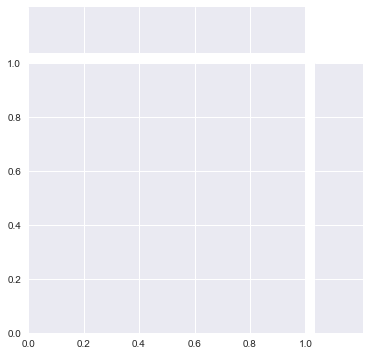

In [35]:
# #Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

# #Initialize a joint-grid with the dataframe, using seaborn library
g = sns.JointGrid(x="fixed acidity", y="pH",
                  data=ax, height=6)

# # Draws a regression plot in the grid
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})

# # Draws a distribution plot in the same grid
g = g.plot_marginals(sns.histplot, kde=True)


# Mối quan hệ giữa axit citric và axit cố định

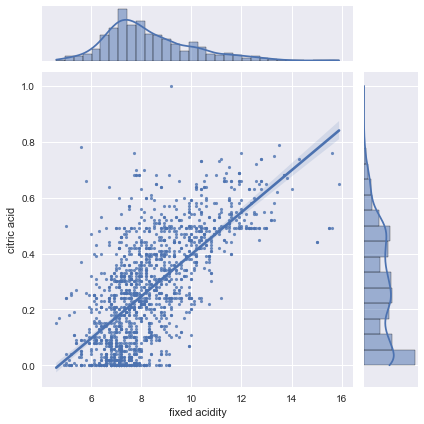

In [ ]:
fixedAcidity_citricAcid = data[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid",
                  data=fixedAcidity_citricAcid, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.histplot, kde=True)


# Mối quan hệ giữa mật độ và axit cố định

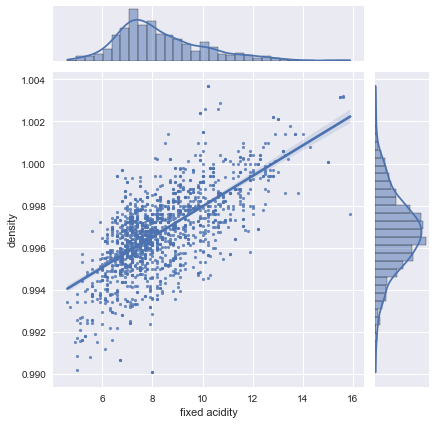

In [ ]:
fixedAcidity_density = data[['density', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="density",
                      data=fixedAcidity_density, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.histplot, kde=True)


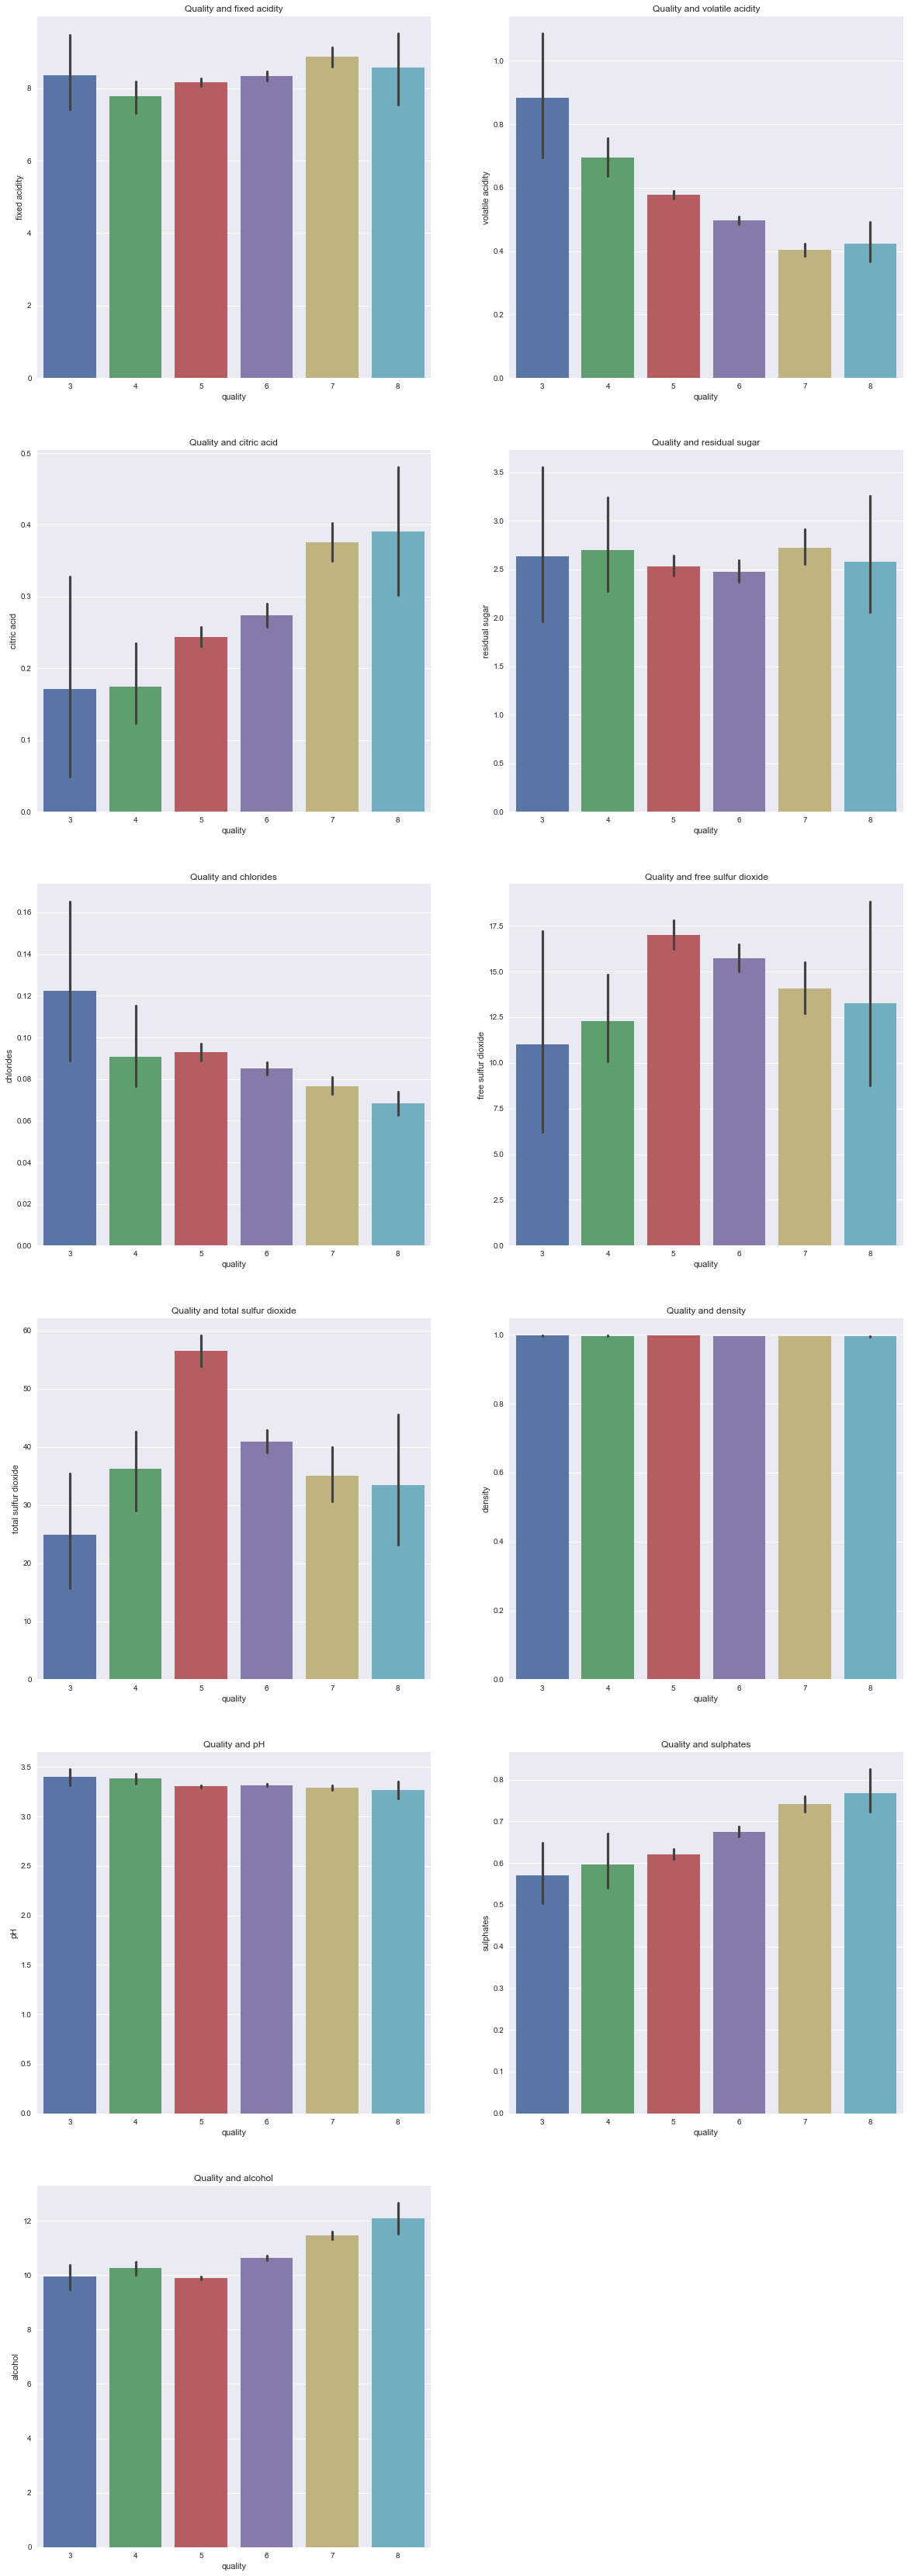

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 60))
quality_corr = list()
for i in list(data.columns):
    quality_corr.append(data[[i, "quality"]])
for i, feature in enumerate(list(data.columns)):
    if i==11:
        break
    sns.barplot(x="quality", y=feature,
                data=quality_corr[i], ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(f"Quality and {feature}")
ax[5,1].set_visible(False)

# Phần 3. Phát hiện ngoại lệ

<p style="font-size:20px">Sử dụng Tukey's method:</p>
<ul>
<li style="font-size:15px">Tìm giá trị thứ 25% trong DataFrame.</li>
<li style="font-size:15px">Tìm giá trị thứ 75% trong DataFrame.</li>
<li style="font-size:15px">Tính toán outlier step.</li>
<li style="font-size:15px">Tìm ra những giá trị ngoại lệ</li>
</ul>

In [ ]:
a,b,c=0,0,0
outlier="chlorides"
# For each feature find the data points with extreme high or low values
for feature in data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    if feature == outlier:
        a=Q1
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    if feature == outlier:
        b=Q3
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    if feature == outlier:
        c = step

    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format(feature))
    #display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])

# OPTIONAL: Select the indices for data points you wish to remove

# Remove the outliers, if any were specified
good_data = data[((data[outlier] >= a - c) &
                  (data[outlier] <= b + c))]
display(good_data)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


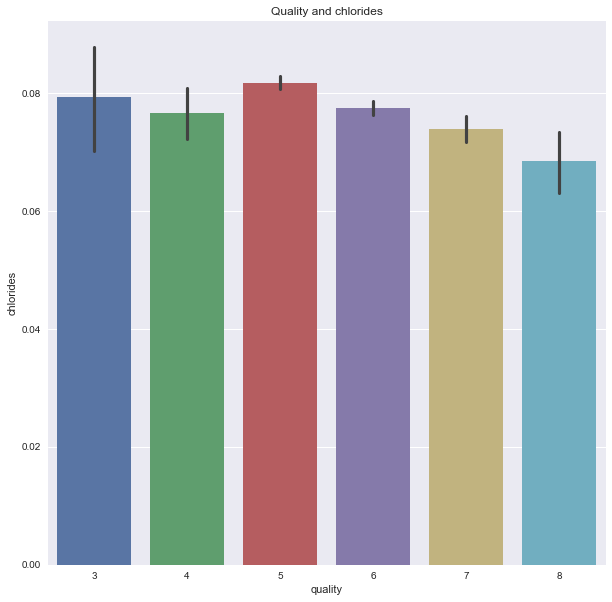

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="quality", y=outlier,
            data=good_data[[outlier, "quality"]], ax=ax)
ax.set_title(f"Quality and {outlier}");
